In [102]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.font_manager as fm

matplotlib.rcParams['font.family'] = 'NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

# 유동인구

## 내국인

In [2]:
# 내국인 유동인구
fp_org = pd.read_csv('02-1_내국인유동인구_KOREAN-002.CSV', encoding='cp949')

In [3]:
fp = fp_org.copy()
fp.head()

,base_date,time,city,emd_cd,emd_nm,sex,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd
0,2018-01-01,1,제주시,50110250,한림읍,여성,0,638.5509,15.5400,151.5149,제주
1,2018-01-01,1,제주시,50110250,한림읍,여성,0,0.0000,3.7249,171.3458,그외
2,2018-01-01,1,제주시,50110250,한림읍,여성,10,668.4577,17.0308,166.0500,제주
3,2018-01-01,1,제주시,50110250,한림읍,여성,10,0.0000,4.2577,195.8539,그외
4,2018-01-01,1,제주시,50110250,한림읍,여성,20,609.7710,5.9490,148.7246,제주


## 외국인

In [4]:
# 장기 체류 외국인 유동인구
lf_org = pd.read_csv('02-2_장기체류 외국인 유동인구_LONG_TERM_FRGN.CSV', encoding='cp949')

In [5]:
lf = lf_org.copy()
lf.head()

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd
0,2018-01-01,1,CAN,제주시,50110250,한림읍,6.3381,0.0000,4.5802,제주
1,2018-01-01,1,CHN,제주시,50110250,한림읍,442.1091,0.0000,5.7051,제주
2,2018-01-01,1,CHN,제주시,50110250,한림읍,0.0000,7.8695,51.3461,그외
3,2018-01-01,1,DEU,제주시,50110250,한림읍,0.0000,0.0000,8.2099,그외
4,2018-01-01,1,ETC,제주시,50110250,한림읍,15.9184,0.0000,2.8758,제주


In [6]:
# 단기 체류 외국인 유동인구
sf_org = pd.read_csv('02-3_단기체류 외국인 유동인구_SHORT_TERM_FRGN.CSV', encoding='cp949')

In [7]:
sf = sf_org.copy()
sf.head()

,base_date,time,nationality,city,emd_cd,emd_nm,visit_pop_cnt
0,2018-01-01,1,CHN,제주시,50110250,한림읍,66.3170
1,2018-01-01,1,ETC,제주시,50110250,한림읍,21.1308
2,2018-01-01,1,HKG,제주시,50110250,한림읍,3.6771
3,2018-01-01,1,JPN,제주시,50110250,한림읍,5.5962
4,2018-01-01,1,USA,제주시,50110250,한림읍,3.9078


In [18]:
# 각 데이터 일별 유동인구
day_fp = fp.groupby('base_date')['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt'].sum()/24
day_lf = lf.groupby('base_date')['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt'].sum()/24
day_sf = sf.groupby('base_date')['visit_pop_cnt'].sum()/24

In [19]:
day_fp.head(3)

,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
base_date,,,
2018-01-01,520028.563088,36485.277000,327030.242108
2018-01-02,517859.539517,61177.743808,299228.203233
2018-01-03,516054.772379,61134.590338,299491.941867


In [20]:
day_lf.head(3)

,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
base_date,,,
2018-01-01,15540.216237,1661.753921,6548.900487
2018-01-02,16379.113929,1913.161921,6196.504338
2018-01-03,16137.037358,1982.676954,6296.335471


In [21]:
day_sf.head(3)

base_date
2018-01-01    6056.619058
2018-01-02    6029.652962
2018-01-03    5953.149242
Name: visit_pop_cnt, dtype: float64

In [22]:
day_fp.shape, day_lf.shape, day_sf.shape

((1277, 3), (1277, 3), (1277,))

In [126]:
day_fp = day_fp.reset_index(drop=True)
day_fp['fp_total'] = day_fp[['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt']].sum(axis=1).reset_index(drop=True)
day_fp.head(3)

,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,fp_total
0,520028.563088,36485.277000,327030.242108,883544.082196
1,517859.539517,61177.743808,299228.203233,878265.486558
2,516054.772379,61134.590338,299491.941867,876681.304583


In [129]:
day_lf = day_lf.reset_index(drop=True)
day_lf['lf_total'] = day_lf[['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt']].sum(axis=1).reset_index(drop=True)
day_lf.head(3)

,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,lf_total
0,15540.216237,1661.753921,6548.900487,23750.870646
1,16379.113929,1913.161921,6196.504338,24488.780188
2,16137.037358,1982.676954,6296.335471,24416.049783


In [130]:
day_sf = day_sf.reset_index(drop=True)

# 연도별 일별 전체(내국인+장,단기체류 외국인) 유동인구

In [122]:
day_total = pd.DataFrame()

In [131]:
day_total['fp_total'] = day_fp['fp_total']
day_total['lf_total'] = day_lf['lf_total']
day_total['sf_visit'] = day_sf
day_total['total'] = day_total.sum(axis=1).round()
day_total.head()

,fp_total,lf_total,sf_visit,total
0,883544.082196,23750.870646,6056.619058,913352.0
1,878265.486558,24488.780188,6029.652962,908784.0
2,876681.304583,24416.049783,5953.149242,907051.0
3,869977.147096,24377.973921,5134.965325,899490.0
4,873329.937929,24784.201158,4587.231046,902701.0


In [132]:
# 연도별 column 분리
day_total_2018 = day_total[:365]
day_total_2019 = day_total[365:730]
day_total_2020 = day_total[730:1096]
day_total_2021 = day_total[1096:]

In [133]:
year_fp_total = pd.DataFrame()
year_fp_total['2018'] = day_total_2018['total'].reset_index(drop=True)
year_fp_total['2019'] = day_total_2019['total'].reset_index(drop=True)
year_fp_total['2020'] = day_total_2020['total'].reset_index(drop=True)
year_fp_total['2021'] = day_total_2021['total'].reset_index(drop=True)
year_fp_total.head()

,2018,2019,2020,2021
0,913352.0,942798.0,948621.0,970910.0
1,908784.0,932615.0,943924.0,975632.0
2,907051.0,924707.0,941448.0,966207.0
3,899490.0,921214.0,934901.0,959088.0
4,902701.0,919525.0,932024.0,955848.0


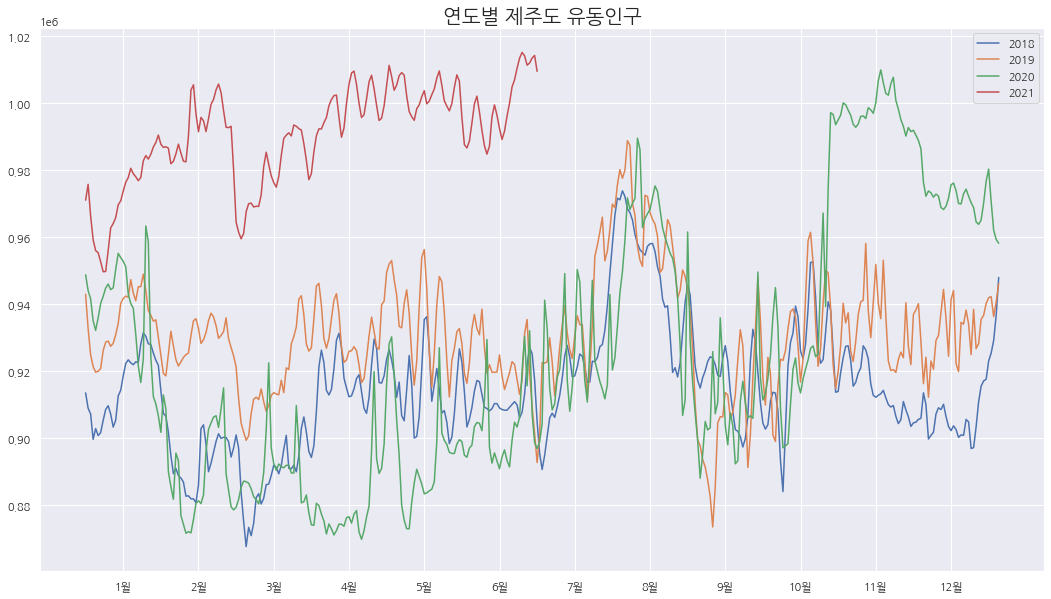

In [134]:
plt.figure(figsize=(18, 10))
plt.plot(year_fp_total)

plt.title('연도별 제주도 유동인구')
plt.rcParams['axes.titlesize'] = 10
plt.xticks(np.arange(15, 365, 30), 
           labels = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
plt.legend(year_fp_total.columns)

# plt.grid()
plt.show()

In [135]:
year_fp_total.describe()

,2018,2019,2020,2021
count,365.000000,365.000000,3.650000e+02,1.810000e+02
mean,914574.452055,930842.750685,9.245706e+05,9.905074e+05
std,18276.241673,17080.532762,3.846761e+04,1.467896e+04
min,867447.000000,873308.000000,8.696260e+05,9.495440e+05
25%,903317.000000,921214.000000,8.937350e+05,9.825160e+05
50%,913290.000000,929621.000000,9.154650e+05,9.925530e+05
75%,923518.000000,940095.000000,9.550680e+05,1.001181e+06
max,973707.000000,988683.000000,1.009816e+06,1.015033e+06


# 거주인구

## (할 일) 월별 제주도 거주인구 추이

In [8]:
# 거주인구
rp_org = pd.read_csv('03_거주인구_RESIDENT_POP.CSV', encoding='cp949')

In [9]:
rp = rp_org.copy()
rp.head()

,base_year,base_month,city,emd_cd,emd_nm,sex,resid_reg_pop,foreign_pop,total_pop
0,2018,1,제주시,50110590,건입동,남성,5085,146,5231
1,2018,1,제주시,50110590,건입동,여성,4715,82,4797
2,2018,1,제주시,50110256,구좌읍,남성,7965,368,8333
3,2018,1,제주시,50110256,구좌읍,여성,7609,184,7793
4,2018,1,서귀포시,50130253,남원읍,남성,9806,428,10234


In [12]:
# day_rp = rp.groupby(['base_year', 'base_month'])['resid_reg_pop', 'foreign_pop', 'total_pop'].sum()
# day_rp.head(3)

resid_reg_pop  foreign_pop  total_pop
base_year base_month                                       
2018      1                  658167        21755     679922
          2                  659189        21906     681095
          3                  660441        22010     682451

In [ ]:
# day_rp.shape

In [11]:
day_dong_rp = rp.groupby(['base_year', 'base_month', 'emd_nm'])['resid_reg_pop', 'foreign_pop', 'total_pop'].sum()
day_dong_rp.head(3)

resid_reg_pop  foreign_pop  total_pop
base_year base_month emd_nm                                       
2018      1          건입동              9800          228      10028
                     구좌읍             15574          552      16126
                     남원읍             19112          628      19740

In [13]:
day_dong_rp.reset_index()

,base_year,base_month,emd_nm,resid_reg_pop,foreign_pop,total_pop
0,2018,1,건입동,9800,228,10028
1,2018,1,구좌읍,15574,552,16126
2,2018,1,남원읍,19112,628,19740
3,2018,1,노형동,53369,1589,54958
4,2018,1,대륜동,13473,178,13651
...,...,...,...,...,...,...
1801,2021,6,표선면,12347,334,12681
1802,2021,6,한경면,9158,337,9495
1803,2021,6,한림읍,21232,3230,24462
1804,2021,6,화북동,24300,330,24630


In [27]:
fp.shape, lf.shape, sf.shape

((47250196, 11), (23837317, 10), (6059044, 7))

In [28]:
fp.head(3)

,base_date,time,city,emd_cd,emd_nm,sex,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd
0,2018-01-01,1,제주시,50110250,한림읍,여성,0,638.5509,15.5400,151.5149,제주
1,2018-01-01,1,제주시,50110250,한림읍,여성,0,0.0000,3.7249,171.3458,그외
2,2018-01-01,1,제주시,50110250,한림읍,여성,10,668.4577,17.0308,166.0500,제주


In [29]:
lf.head(3)

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd
0,2018-01-01,1,CAN,제주시,50110250,한림읍,6.3381,0.0000,4.5802,제주
1,2018-01-01,1,CHN,제주시,50110250,한림읍,442.1091,0.0000,5.7051,제주
2,2018-01-01,1,CHN,제주시,50110250,한림읍,0.0000,7.8695,51.3461,그외


In [30]:
sf.head(3)

,base_date,time,nationality,city,emd_cd,emd_nm,visit_pop_cnt
0,2018-01-01,1,CHN,제주시,50110250,한림읍,66.3170
1,2018-01-01,1,ETC,제주시,50110250,한림읍,21.1308
2,2018-01-01,1,HKG,제주시,50110250,한림읍,3.6771


In [32]:
# 유동인구 월별 행정동별 
day_dong_fp = fp.groupby(['base_date', 'emd_nm'])['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt'].sum()/24
day_dong_lf = lf.groupby(['base_date', 'emd_nm'])['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt'].sum()/24
day_dong_sf = sf.groupby(['base_date', 'emd_nm'])['visit_pop_cnt'].sum()/24

In [33]:
day_dong_fp.head(3)

resd_pop_cnt  work_pop_cnt  visit_pop_cnt
base_date  emd_nm                                           
2018-01-01 건입동      7086.222050    790.594863    7583.571650
           구좌읍     11212.172696    701.134825   10101.778808
           남원읍     11852.424667    738.437638    8910.043283

In [34]:
day_dong_fp = day_dong_fp.reset_index()
day_dong_fp.head(3)

,base_date,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
0,2018-01-01,건입동,7086.222050,790.594863,7583.571650
1,2018-01-01,구좌읍,11212.172696,701.134825,10101.778808
2,2018-01-01,남원읍,11852.424667,738.437638,8910.043283


In [38]:
day_dong_lf = day_dong_lf.reset_index()
day_dong_lf.head(3)

,base_date,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
0,2018-01-01,건입동,186.457138,33.242263,199.084225
1,2018-01-01,구좌읍,296.994937,29.786233,137.257233
2,2018-01-01,남원읍,289.612692,42.567804,91.478800


In [39]:
day_dong_sf = day_dong_sf.reset_index()
day_dong_sf.head(3)

,base_date,emd_nm,visit_pop_cnt
0,2018-01-01,건입동,199.048442
1,2018-01-01,구좌읍,98.635696
2,2018-01-01,남원읍,148.013617


In [ ]:
day_dong_sf['sf_pop'] = day_dong_sf[['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt']].sum(axis=1)

In [40]:
day_dong_fp.shape, day_dong_lf.shape, day_dong_sf.shape

((54911, 8), (54911, 5), (53716, 3))

In [36]:
import datetime

day_dong_fp['base_date'] = pd.to_datetime(day_dong_fp['base_date']) 

# 년도 추출
day_dong_fp['Year'] = day_dong_fp['base_date'].dt.year
# 월 추출
day_dong_fp['Month'] = day_dong_fp['base_date'].dt.month
# 일 추출
day_dong_fp['Day'] = day_dong_fp['base_date'].dt.day

In [37]:
day_dong_fp.head(3)

,base_date,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,Year,Month,Day
0,2018-01-01,건입동,7086.222050,790.594863,7583.571650,2018,1,1
1,2018-01-01,구좌읍,11212.172696,701.134825,10101.778808,2018,1,1
2,2018-01-01,남원읍,11852.424667,738.437638,8910.043283,2018,1,1


In [42]:
day_dong_fp['ko_pop'] = day_dong_fp[['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt']].sum(axis=1)
day_dong_fp

,base_date,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,Year,Month,Day,ko_pop
0,2018-01-01,건입동,7086.222050,790.594863,7583.571650,2018,1,1,15460.388563
1,2018-01-01,구좌읍,11212.172696,701.134825,10101.778808,2018,1,1,22015.086329
2,2018-01-01,남원읍,11852.424667,738.437638,8910.043283,2018,1,1,21500.905587
3,2018-01-01,노형동,48812.404250,2993.037633,17692.101558,2018,1,1,69497.543442
4,2018-01-01,대륜동,11029.834179,831.755708,8696.705329,2018,1,1,20558.295217
...,...,...,...,...,...,...,...,...,...
54906,2021-06-30,표선면,9970.182508,980.039933,6585.483442,2021,6,30,17535.705883
54907,2021-06-30,한경면,6975.744213,667.900937,4106.926950,2021,6,30,11750.572100
54908,2021-06-30,한림읍,19603.540783,2049.712771,11956.299983,2021,6,30,33609.553538
54909,2021-06-30,화북동,23854.191400,2089.692246,10043.682913,2021,6,30,35987.566558


In [67]:
ko_pop = day_dong_fp.groupby(['Year', 'Month', 'emd_nm'])['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt','ko_pop'].mean()
ko_pop.head(3)

resd_pop_cnt  work_pop_cnt  visit_pop_cnt        ko_pop
Year Month emd_nm                                                         
2018 1     건입동      6634.385743    946.149621    6638.302450  14218.837814
           구좌읍     10751.059765   1013.241910    6854.462701  18618.764376
           남원읍     11624.075800    930.702789    7466.433704  20021.212293

In [68]:
ko_pop = ko_pop.reset_index()
ko_pop.head()

,Year,Month,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,ko_pop
0,2018,1,건입동,6634.385743,946.149621,6638.302450,14218.837814
1,2018,1,구좌읍,10751.059765,1013.241910,6854.462701,18618.764376
2,2018,1,남원읍,11624.075800,930.702789,7466.433704,20021.212293
3,2018,1,노형동,48798.691607,4828.343218,20523.984239,74151.019064
4,2018,1,대륜동,11121.290470,1089.393056,8871.289268,21081.972794


In [69]:
day_dong_lf['base_date'] = pd.to_datetime(day_dong_fp['base_date']) 

day_dong_lf['Year'] = day_dong_lf['base_date'].dt.year
day_dong_lf['Month'] = day_dong_lf['base_date'].dt.month
day_dong_lf['Day'] = day_dong_lf['base_date'].dt.day

day_dong_lf['lf_pop'] = day_dong_lf[['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt']].sum(axis=1)
lf_pop = day_dong_lf.groupby(['Year', 'Month', 'emd_nm'])['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt', 'lf_pop'].mean()
lf_pop = lf_pop.reset_index()
lf_pop.head()

,Year,Month,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,lf_pop
0,2018,1,건입동,136.833928,22.774039,154.928595,314.536562
1,2018,1,구좌읍,297.539494,46.853053,178.427172,522.819719
2,2018,1,남원읍,288.154627,43.087138,217.461874,548.703640
3,2018,1,노형동,1883.286604,161.591088,562.179976,2607.057667
4,2018,1,대륜동,150.475697,14.219732,175.821510,340.516940


In [57]:
day_dong_sf['base_date'] = pd.to_datetime(day_dong_fp['base_date']) 

day_dong_sf['Year'] = day_dong_sf['base_date'].dt.year
day_dong_sf['Month'] = day_dong_sf['base_date'].dt.month
day_dong_sf['Day'] = day_dong_sf['base_date'].dt.day

day_dong_sf['sf_pop'] = day_dong_sf['visit_pop_cnt']
sf_pop = day_dong_sf.groupby(['Year', 'Month', 'emd_nm'])['sf_pop'].mean()
sf_pop = sf_pop.reset_index()
sf_pop.head()

,Year,Month,emd_nm,sf_pop
0,2018,1,건입동,105.138548
1,2018,1,구좌읍,62.587031
2,2018,1,남원읍,343.501559
3,2018,1,노형동,268.223038
4,2018,1,대륜동,57.563006


In [70]:
ko_pop.shape, lf_pop.shape, sf_pop.shape

((1806, 7), (1806, 7), (1806, 4))

In [79]:
# 거주인구
day_dong_rp.shape

(1806, 3)

In [83]:
day_dong_rp = day_dong_rp.reset_index()

In [84]:
day_dong_rp.head(3)

,base_year,base_month,emd_nm,resid_reg_pop,foreign_pop,total_pop
0,2018,1,건입동,9800,228,10028
1,2018,1,구좌읍,15574,552,16126
2,2018,1,남원읍,19112,628,19740


In [85]:
fp_n_rp = pd.DataFrame()

fp_n_rp['내국인 거주인구'] = day_dong_rp['resid_reg_pop']
fp_n_rp['외국인 거주인구'] = day_dong_rp['foreign_pop']
fp_n_rp['총 거주인구'] = day_dong_rp['total_pop']

fp_n_rp['총 유동인구'] = ko_pop['ko_pop'] + lf_pop['lf_pop'] + sf_pop['sf_pop']
fp_n_rp['총 내국인 유동인구'] = ko_pop['ko_pop']
fp_n_rp['총 장단기 외국인 유동인구'] = lf_pop['lf_pop'] + sf_pop['sf_pop']
fp_n_rp['총 장기 외국인 유동인구'] = lf_pop['lf_pop']

fp_n_rp['내국인 거주인구'] = ko_pop['resd_pop_cnt']
fp_n_rp['장기 외국인 거주인구'] = lf_pop['resd_pop_cnt']

fp_n_rp['내국인 근무인구'] = ko_pop['work_pop_cnt']
fp_n_rp['장기 외국인 근무인구'] = lf_pop['work_pop_cnt']

fp_n_rp['내국인 방문인구'] = ko_pop['visit_pop_cnt']
fp_n_rp['장기 외국인 방문인구'] = lf_pop['visit_pop_cnt']
fp_n_rp['단기 외국인 방문인구'] = sf_pop['sf_pop']

fp_n_rp.head(3)

,내국인 거주인구,외국인 거주인구,총 거주인구,총 유동인구,총 내국인 유동인구,총 장단기 외국인 유동인구,총 장기 외국인 유동인구,장기 외국인 거주인구,내국인 근무인구,장기 외국인 근무인구,내국인 방문인구,장기 외국인 방문인구,단기 외국인 방문인구
0,6634.385743,228,10028,14638.512925,14218.837814,419.675110,314.536562,136.833928,946.149621,22.774039,6638.302450,154.928595,105.138548
1,10751.059765,552,16126,19204.171126,18618.764376,585.406750,522.819719,297.539494,1013.241910,46.853053,6854.462701,178.427172,62.587031
2,11624.075800,628,19740,20913.417491,20021.212293,892.205199,548.703640,288.154627,930.702789,43.087138,7466.433704,217.461874,343.501559


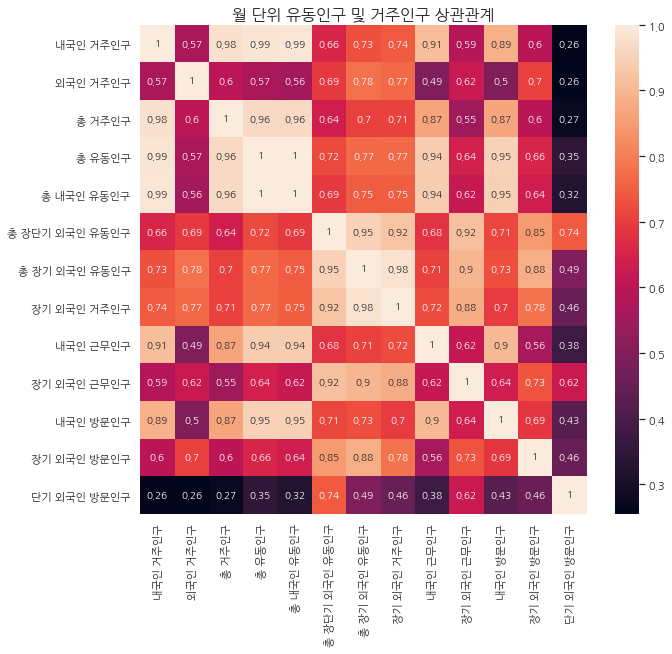

In [119]:
plt.title('월 단위 유동인구 및 거주인구 상관관계')
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['figure.figsize'] = (10, 9)

sns.heatmap(fp_n_rp.corr(), annot=True, annot_kws={'size':10})
plt.show()

# 음식물 쓰레기

In [65]:
# 음식물쓰레기 배출량
fw_org = pd.read_csv('01_음식물쓰레기_FOOD_WASTE_210811_update.CSV', encoding='cp949')

In [66]:
fw = fw_org.copy()
fw.head()

,base_date,city,emd_cd,emd_nm,em_area_cd,em_cnt,em_g,pay_amt
0,2018-01-01,제주시,50110670,외도동,W6X062,2,15500,464
1,2018-01-01,제주시,50110630,아라동,W6XA97,25,59800,1787
2,2018-01-01,제주시,50110630,아라동,W6XA96,8,25350,758
3,2018-01-01,제주시,50110630,아라동,W6XA95,12,30000,898
4,2018-01-01,제주시,50110630,아라동,W6XA94,14,44050,1317


In [73]:
date_dong_fw = fw.groupby(['base_date', 'emd_nm'])['em_g'].sum()
date_dong_fw

base_date   emd_nm
2018-01-01  건입동       1708250
            남원읍       1239600
            노형동       9357900
            대륜동       1717700
            대정읍       1264950
                       ...   
2021-06-30  표선면       1377450
            한경면        973850
            한림읍       3298100
            화북동       3749600
            효돈동       1011050
Name: em_g, Length: 50522, dtype: int64

In [74]:
date_dong_fw = date_dong_fw.reset_index()
date_dong_fw.head(3)

,base_date,emd_nm,em_g
0,2018-01-01,건입동,1708250
1,2018-01-01,남원읍,1239600
2,2018-01-01,노형동,9357900


In [75]:
date_dong_fw['base_date'] = pd.to_datetime(date_dong_fw['base_date']) 

date_dong_fw['Year'] = date_dong_fw['base_date'].dt.year
date_dong_fw['Month'] = date_dong_fw['base_date'].dt.month
date_dong_fw['Day'] = date_dong_fw['base_date'].dt.day

date_dong_fw.head(3)

,base_date,emd_nm,em_g,Year,Month,Day
0,2018-01-01,건입동,1708250,2018,1,1
1,2018-01-01,남원읍,1239600,2018,1,1
2,2018-01-01,노형동,9357900,2018,1,1


In [76]:
mon_dong_fw = date_dong_fw.groupby(['Year', 'Month', 'emd_nm'])['em_g'].sum()
mon_dong_fw = mon_dong_fw.reset_index()
mon_dong_fw.head()

,Year,Month,emd_nm,em_g
0,2018,1,건입동,45646550
1,2018,1,남원읍,42437700
2,2018,1,노형동,265018400
3,2018,1,대륜동,57612600
4,2018,1,대정읍,38885550


In [77]:
mon_dong_fw.shape

(1666, 4)

### 행정동별 

(쓰레기 배출 데이터에서 '알수없음', '추자면', '우도면' 제외한 뒤 
row data 수 비교)

In [85]:
'''
fp_n_rp = pd.DataFrame()

fp_n_rp['내국인 거주인구'] = day_dong_rp['resid_reg_pop']
fp_n_rp['외국인 거주인구'] = day_dong_rp['foreign_pop']
fp_n_rp['총 거주인구'] = day_dong_rp['total_pop']

fp_n_rp['총 유동인구'] = ko_pop['ko_pop'] + lf_pop['lf_pop'] + sf_pop['sf_pop']
fp_n_rp['총 내국인 유동인구'] = ko_pop['ko_pop']
fp_n_rp['총 장단기 외국인 유동인구'] = lf_pop['lf_pop'] + sf_pop['sf_pop']
fp_n_rp['총 장기 외국인 유동인구'] = lf_pop['lf_pop']

fp_n_rp['내국인 거주인구'] = ko_pop['resd_pop_cnt']
fp_n_rp['장기 외국인 거주인구'] = lf_pop['resd_pop_cnt']

fp_n_rp['내국인 근무인구'] = ko_pop['work_pop_cnt']
fp_n_rp['장기 외국인 근무인구'] = lf_pop['work_pop_cnt']

fp_n_rp['내국인 방문인구'] = ko_pop['visit_pop_cnt']
fp_n_rp['장기 외국인 방문인구'] = lf_pop['visit_pop_cnt']
fp_n_rp['단기 외국인 방문인구'] = sf_pop['sf_pop']

fp_n_rp['배출량'] = ??

fp_n_rp.head(3)
'''

,내국인 거주인구,외국인 거주인구,총 거주인구,총 유동인구,총 내국인 유동인구,총 장단기 외국인 유동인구,총 장기 외국인 유동인구,장기 외국인 거주인구,내국인 근무인구,장기 외국인 근무인구,내국인 방문인구,장기 외국인 방문인구,단기 외국인 방문인구
0,6634.385743,228,10028,14638.512925,14218.837814,419.675110,314.536562,136.833928,946.149621,22.774039,6638.302450,154.928595,105.138548
1,10751.059765,552,16126,19204.171126,18618.764376,585.406750,522.819719,297.539494,1013.241910,46.853053,6854.462701,178.427172,62.587031
2,11624.075800,628,19740,20913.417491,20021.212293,892.205199,548.703640,288.154627,930.702789,43.087138,7466.433704,217.461874,343.501559


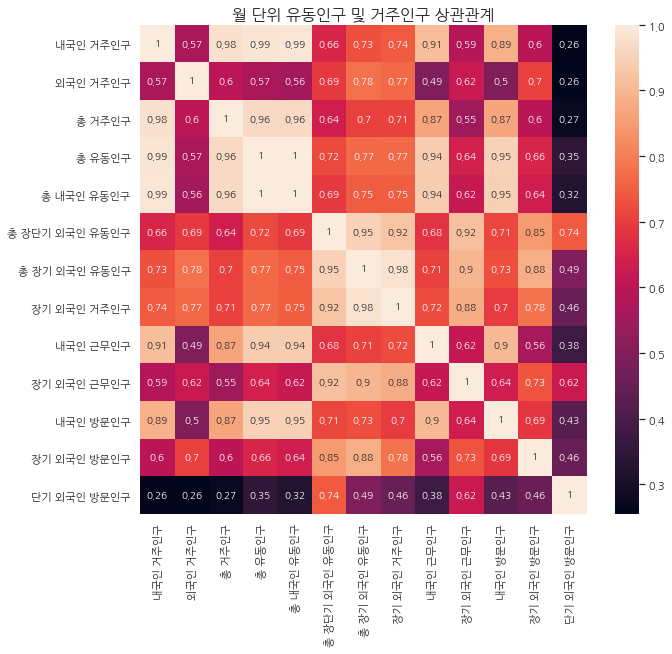

In [119]:
'''
plt.title('월 단위 인구 및 음식물 쓰레기 배출량 상관관계')
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['figure.figsize'] = (10, 9)

sns.heatmap(fp_n_rp.corr(), annot=True, annot_kws={'size':10})
plt.show()
'''

In [62]:
df3_all = pd.read_csv('전체데이터통합3.CSV', encoding='cp949')
df3_all.head(3)

,base_date,city,emd_nm,0여성notvisit,0여성visit,0남성notvisit,0남성visit,10여성notvisit,10여성visit,10남성notvisit,...,평균 상대습도(%),평균 현지기압(hPa),합계 일사량(MJ/m2),일 최심신적설(cm),평균 전운량(1/10),내국인거주남성,외국인거주남성,내국인거주여성,외국인거주여성,배출량
0,2018-01-01,서귀포시,남원읍,11030.2331,9791.3235,11498.2617,10650.5811,13324.2924,10954.4914,15372.8110,...,58.9,1020.3,0.00,0.0,0.0,9806,428,9306,200,1239600
1,2018-01-01,서귀포시,대륜동,17647.5285,10160.5833,15216.9486,10298.1857,14152.0528,11361.8229,12541.6031,...,58.9,1020.3,0.00,0.0,0.0,6836,83,6637,95,1717700
2,2018-01-01,서귀포시,대정읍,12538.2881,7792.5662,14360.4369,6043.2109,16053.7231,8710.5446,19530.3550,...,58.4,1018.5,7.72,0.0,0.0,10360,841,10725,677,1264950


In [63]:
df3_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48421 entries, 0 to 48420
Data columns (total 59 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   base_date       48421 non-null  object 
 1   city            48421 non-null  object 
 2   emd_nm          48421 non-null  object 
 3   0여성notvisit     48421 non-null  float64
 4   0여성visit        48421 non-null  float64
 5   0남성notvisit     48421 non-null  float64
 6   0남성visit        48421 non-null  float64
 7   10여성notvisit    48421 non-null  float64
 8   10여성visit       48421 non-null  float64
 9   10남성notvisit    48421 non-null  float64
 10  10남성visit       48421 non-null  float64
 11  20여성notvisit    48421 non-null  float64
 12  20여성visit       48421 non-null  float64
 13  20남성notvisit    48421 non-null  float64
 14  20남성visit       48421 non-null  float64
 15  30여성notvisit    48421 non-null  float64
 16  30여성visit       48421 non-null  float64
 17  30남성notvisit    48421 non-null 

In [64]:
df3_all.shape

(48421, 59)

In [ ]:
rp_df3 = df3_all.iloc[:, 54:-1]
fw_df3 = df3_all.iloc[:, -1]

In [ ]:
rp_df3.head(3)

In [ ]:
fw_df3.head(3)

In [120]:
df3_all['배출량'].describe()

count    4.842100e+04
mean     2.159604e+06
std      1.988692e+06
min      0.000000e+00
25%      8.040500e+05
50%      1.523750e+06
75%      2.733100e+06
max      1.384325e+07
Name: 배출량, dtype: float64

In [ ]:
2,159,604(g)